# What is the relationship between job role and mental health?
### Methodology
1. Explore the relation between the top job roles and burnout level experienced


In [3]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, to_hex, ListedColormap

# Load the dataset
df = pd.read_csv('data\post_pandemic_remote_work_health_impact_2025.csv')

# Clean the data
df_survey = df.copy()
df_survey['Survey_Date'] = pd.to_datetime(df_survey['Survey_Date'], format='%Y-%m-%d')
df_survey['Physical_Health_Issues'] = df_survey['Physical_Health_Issues'].apply(lambda x: [item.strip() for item in x.split(';')] if pd.notnull(x) else x)
df_survey['Mental_Health_Status'] = df_survey['Mental_Health_Status'].fillna('Non-Diagnosis')

# Definition of the color palette
custom_colors = ['#A6AEAE', '#FB4F2A', '#A90113', '#75000C', '#3C0B09']
custom_cmap = ListedColormap(custom_colors)
smooth_cmap = LinearSegmentedColormap.from_list("custom_gradient", custom_colors, N=256)

In [29]:
# Group by mental health and hours per week
role_burnout = df_survey.groupby(['Job_Role','Burnout_Level']).size().sort_values(ascending=False).reset_index(name='count')
role_burnout


,Job_Role,Burnout_Level,count
0,Research Scientist,Medium,73
1,Social Media Manager,Medium,68
2,Customer Service Manager,Medium,65
3,Project Manager,Medium,63
4,Quality Assurance,Medium,62
...,...,...,...
67,Data Scientist,Low,27
68,Content Writer,Low,25
69,Software Engineer,Low,24
70,Executive Assistant,Low,21


In [75]:
# Pivot the data for plotting
top_no = 15
role_burnout_pivot = role_burnout.pivot(index='Job_Role', columns='Burnout_Level', values='count').fillna(0)
role_burnout_pivot['Total'] = role_burnout_pivot.sum(axis=1)

# Get the top job roles
role_burnout_pivot = role_burnout_pivot.sort_values(by='Total', ascending=False).head(top_no)

# Order the columns
role_burnout_pivot.drop(columns='Total', inplace=True)
role_burnout_pivot = role_burnout_pivot[['High', 'Medium', 'Low']]
role_burnout_pivot

Burnout_Level,High,Medium,Low
Job_Role,,,
Research Scientist,46,73,32
DevOps Engineer,49,60,40
Social Media Manager,42,68,34
Customer Service Manager,44,65,35
Data Analyst,49,57,37
Operations Manager,48,60,34
HR Manager,61,51,29
IT Support,53,52,35
Data Scientist,50,59,27


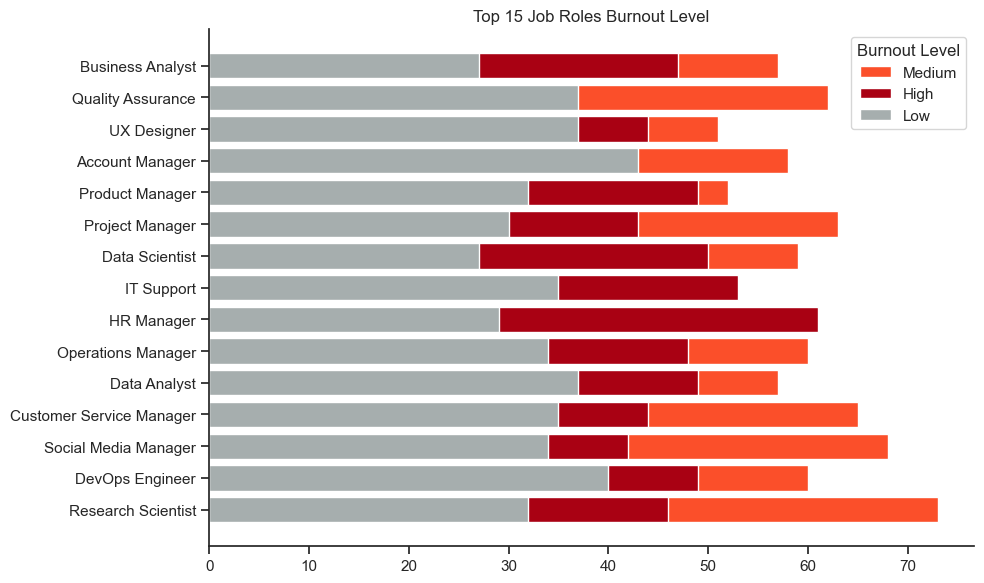

In [78]:
# Plot the burnout level by job role
sns.set_theme(style='ticks')
plt.figure(figsize=(10, 6))
bottom = [0] * len(role_burnout_pivot)

burnout_levels = ['Medium','High','Low']
burnout_colors = {
    'Low': '#A6AEAE',
    'Medium': '#FB4F2A',
    'High': '#A90113'
}

for level in burnout_levels:
    plt.barh(role_burnout_pivot.index, role_burnout_pivot[level], color=burnout_colors[level], label=level)
    bottom = [i + j for i, j in zip(bottom, role_burnout_pivot[level])]

plt.xlabel('')
plt.ylabel('')
plt.title(f'Top {top_no} Job Roles Burnout Level')
plt.tight_layout()
plt.legend(title='Burnout Level')
sns.despine()